In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('C:/Users/User/Desktop/radarbase_clean.csv')

In [5]:
unclassified_data = df[df['Species'].isnull()]

In [6]:
data = df[df['Species'].isnull() == False]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = data.drop(['Species', 'Identifier', 'Unnamed: 0'], axis=1)
y = data['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
rfc = RandomForestClassifier(n_estimators=100)

In [11]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
predictions = rfc.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print(confusion_matrix(y_test,predictions))

[[18  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0 24  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  2  0  0  0  0  0]
 [ 1  0  0  0  4  0  0  0  0  0  0  1  2  0]
 [ 0  0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0 34  0  0  4  2  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0]
 [ 1  0  0  0  0  0  0  0  4  0  0  0 97  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 29]]


In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        ACCI       0.86      1.00      0.92        18
        AMKE       1.00      0.50      0.67         2
        ANAT       1.00      1.00      1.00        24
        ARDE       1.00      0.91      0.95        23
        CORA       1.00      0.50      0.67         8
        EUST       1.00      1.00      1.00         4
        GREG       1.00      1.00      1.00         2
        GTGR       1.00      1.00      1.00         2
        LARI       0.85      0.83      0.84        41
        NOHA       1.00      1.00      1.00         1
        OSPR       1.00      1.00      1.00         2
        RTHA       0.71      1.00      0.83        12
        TUVU       0.94      0.95      0.95       102
        WFIB       1.00      0.97      0.98        30

    accuracy                           0.93       271
   macro avg       0.95      0.90      0.91       271
weighted avg       0.93      0.93      0.92       271



In [16]:
new_predictions = rfc.predict(unclassified_data.drop(['Identifier', 'Species', 'Unnamed: 0'], axis=1))

In [17]:
new_predictions

array(['LARI', 'TUVU', 'TUVU', ..., 'ARDE', 'LARI', 'ARDE'], dtype=object)

In [18]:
unclassified_data.loc[:,'Species'] = new_predictions

In [19]:
print(unclassified_data[['Identifier', 'Species', 'Unnamed: 0']])

                     Identifier Species  Unnamed: 0
0      A_240216094327_ATRK_0061    LARI           1
1      A_240216094327_ATRK_0061    TUVU           2
2      A_240216094327_ATRK_0061    TUVU           3
3      A_240216094327_ATRK_0150    ARDE           4
4      A_240216094327_ATRK_0150    LARI           5
...                         ...     ...         ...
66061  A_240216135950_ATRK_3328    TUVU       66062
66062  A_240216140025_ATRK_3980    TUVU       66063
66063  A_240216140013_ATRK_3690    ARDE       66064
66064  A_240216140000_ATRK_3356    LARI       66065
66065  A_240216140030_ATRK_4131    ARDE       66066

[65359 rows x 3 columns]


In [20]:
unclassified_data.head(10)

,Unnamed: 0,Identifier,Species,Latitude,Longitude,Stereo_X,Stereo_Y,Distance,Azimuth,Speed,...,IntensityAve,WidthAve,DepthAve,DistanceAve,GroundSpeed,GroundSpeedAve,GroundSpeedAveDir,CCSpeed,CCSpeedDir,Straightness
0,1,A_240216094327_ATRK_0061,LARI,32.166637,-115.082380,907.601527,-173.307440,924.000000,100.810549,12.7,...,42.2,20.7,54.0,924.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,2,A_240216094327_ATRK_0061,TUVU,32.166685,-115.082435,902.490841,-168.030598,918.000000,100.546874,3.7,...,42.4,31.3,75.0,921.0,3.7,3.7,316.1,3.7,316.1,1.000000
2,3,A_240216094327_ATRK_0061,TUVU,32.166390,-115.082231,921.712017,-200.717761,943.313660,102.285285,18.8,...,57.5,25.6,66.0,928.4,11.3,7.6,152.9,7.7,152.9,0.681345
3,4,A_240216094327_ATRK_0150,ARDE,32.166162,-115.100315,-784.055509,-226.081751,816.000000,253.915128,4.9,...,43.6,8.7,18.0,816.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,5,A_240216094327_ATRK_0150,LARI,32.165990,-115.100521,-803.454968,-245.071651,840.000000,253.037127,13.6,...,35.3,5.0,18.0,828.0,13.6,13.6,225.5,13.6,225.5,1.000000
5,6,A_240216094327_ATRK_0150,LARI,32.165824,-115.100699,-820.282031,-263.542351,861.578308,252.188691,12.5,...,34.0,4.6,18.0,839.2,13.0,13.0,223.9,13.0,223.9,0.999592
6,7,A_240216094327_ATRK_0150,TUVU,32.165354,-115.101450,-891.077260,-315.592913,945.313477,250.497377,14.6,...,37.7,8.1,19.5,865.7,14.0,13.5,227.4,13.9,230.0,0.996542
7,8,A_240216094328_ATRK_0186,TUVU,32.195458,-115.111106,-1801.284322,3022.769046,3518.772217,329.209059,9.8,...,79.6,102.0,42.0,3518.8,0.0,0.0,0.0,0.0,0.0,0.000000
8,9,A_240216094328_ATRK_0186,TUVU,32.195451,-115.111171,-1807.403030,3021.969246,3521.221924,329.116870,3.1,...,78.6,83.2,42.0,3520.0,3.1,3.1,262.5,3.1,262.5,1.000000
9,10,A_240216094328_ATRK_0186,TUVU,32.195487,-115.111177,-1807.992428,3025.907653,3524.904785,329.141507,2.0,...,78.4,75.2,36.0,3521.6,2.5,1.8,295.0,1.8,295.2,0.728690


In [21]:
# Concatenar datos originales y datos predichos
data = pd.concat([data,unclassified_data], ignore_index=True)

In [22]:
data.head()

,Unnamed: 0,Identifier,Species,Latitude,Longitude,Stereo_X,Stereo_Y,Distance,Azimuth,Speed,...,IntensityAve,WidthAve,DepthAve,DistanceAve,GroundSpeed,GroundSpeedAve,GroundSpeedAveDir,CCSpeed,CCSpeedDir,Straightness
0,57,A_240216094343_ATRK_0694,NOHA,32.158285,-115.105313,-1255.569491,-1099.519192,1668.950928,228.790928,5.7,...,46.9,30.5,30.0,1669.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,58,A_240216094343_ATRK_0694,NOHA,32.158334,-115.105373,-1261.244201,-1094.082020,1669.656372,229.059588,3.9,...,48.4,35.6,33.0,1669.3,3.9,3.9,313.9,3.9,313.9,1.000000
2,59,A_240216094343_ATRK_0694,NOHA,32.158354,-115.105383,-1262.128064,-1091.795594,1668.827393,229.138771,1.2,...,49.3,33.0,32.0,1669.1,2.6,2.5,319.8,2.5,319.8,0.982796
3,60,A_240216094343_ATRK_0694,NOHA,32.158445,-115.105573,-1280.117022,-1081.702932,1675.941772,229.802084,10.2,...,49.8,27.3,28.5,1670.8,5.1,5.0,306.1,5.0,306.1,0.980398
4,3731,A_240216095326_ATRK_2169,GREG,32.192586,-115.070321,2044.519525,2704.295691,3390.173340,37.090251,12.3,...,34.7,15.6,30.0,3390.2,0.0,0.0,0.0,0.0,0.0,0.000000


In [24]:
# Guardar en csv
data.to_csv('data_and_predict.csv', index=False)

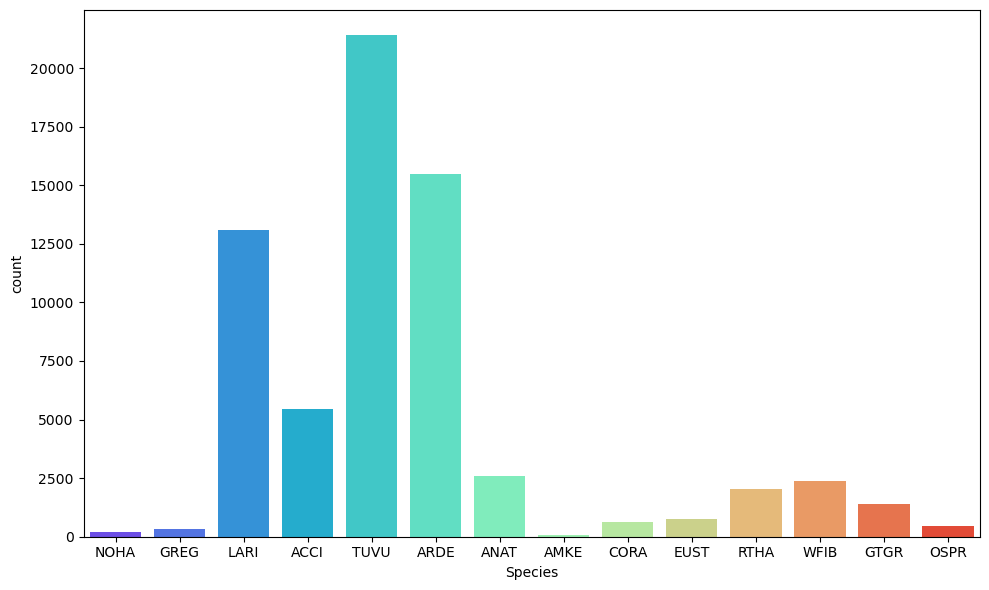

In [23]:
# Graficar el conteo por especie
plt.figure(figsize=(10, 6))
sns.countplot(x='Species', data=data, palette="rainbow")
plt.tight_layout()

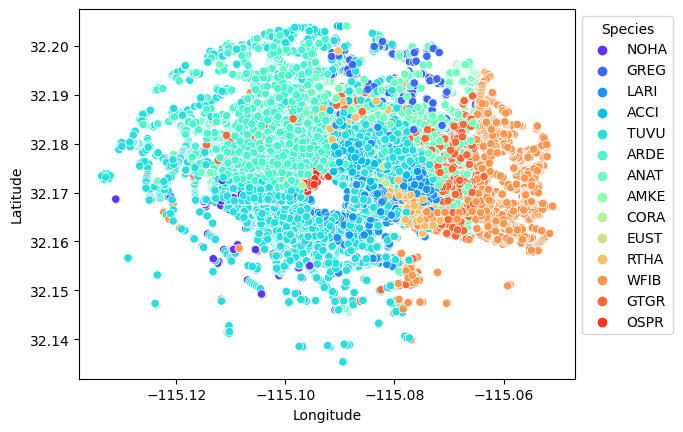

In [24]:
# Graficar la ubicación por especie 
ax = sns.scatterplot(x='Longitude', y='Latitude', data=data, hue='Species', palette='rainbow')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Agrupar por identificador (Identifier) y calcular el promedio

In [25]:
# Calcular la especie más común por 'Identifier'
species_mode = (
    data.groupby('Identifier')['Species']
    .apply(lambda x: x.value_counts().idxmax())
    .reset_index(name='Species_Mode')
)

# Calcular promedios de columnas numéricas por 'Identifier' (excluyendo 'Identifier' y 'Species')
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['Identifier', 'Species']]

# Calcular promedios
group_means = data.groupby('Identifier')[numeric_cols].mean().reset_index()

# Unir species_mode y group_means
data_groupid = pd.merge(
    species_mode,
    group_means,
    on='Identifier',
    how='left'
)

# Verificación
print("Identifiers sin especie consolidada:", data_groupid['Species_Mode'].isna().sum())
data_groupid.head()

Identifiers sin especie consolidada: 0


,Identifier,Species_Mode,Unnamed: 0,Latitude,Longitude,Stereo_X,Stereo_Y,Distance,Azimuth,Speed,...,IntensityAve,WidthAve,DepthAve,DistanceAve,GroundSpeed,GroundSpeedAve,GroundSpeedAveDir,CCSpeed,CCSpeedDir,Straightness
0,A_240216094326_ATRK_0016,TUVU,9673.333333,32.186122,-115.080569,1078.277640,1987.385589,2261.110392,28.484234,7.833333,...,62.900000,26.083333,21.933333,2233.583333,10.283333,6.966667,29.033333,7.600000,32.516667,0.610299
1,A_240216094326_ATRK_0040,WFIB,3386.666667,32.177006,-115.065178,2529.874305,976.770964,2712.318441,68.814141,16.822222,...,39.522222,48.483333,41.100000,2548.666667,15.550000,15.938889,80.822222,15.466667,80.172222,0.939704
2,A_240216094326_ATRK_0050,LARI,7270.750000,32.172452,-115.076182,1492.131253,471.532182,1564.865753,72.464486,15.225000,...,51.950000,37.637500,37.425000,1492.800000,13.487500,13.475000,62.675000,13.450000,62.512500,0.872668
3,A_240216094327_ATRK_0061,TUVU,14476.250000,32.166525,-115.082319,913.379101,-185.693390,932.156830,101.481998,13.500000,...,49.900000,25.800000,65.250000,925.450000,6.575000,4.725000,155.475000,4.775000,155.475000,0.590672
4,A_240216094327_ATRK_0150,LARI,11584.400000,32.165737,-115.100887,-837.989406,-273.176316,881.641052,252.027140,12.040000,...,37.660000,6.900000,18.600000,842.920000,10.920000,10.720000,180.840000,10.880000,181.880000,0.798535


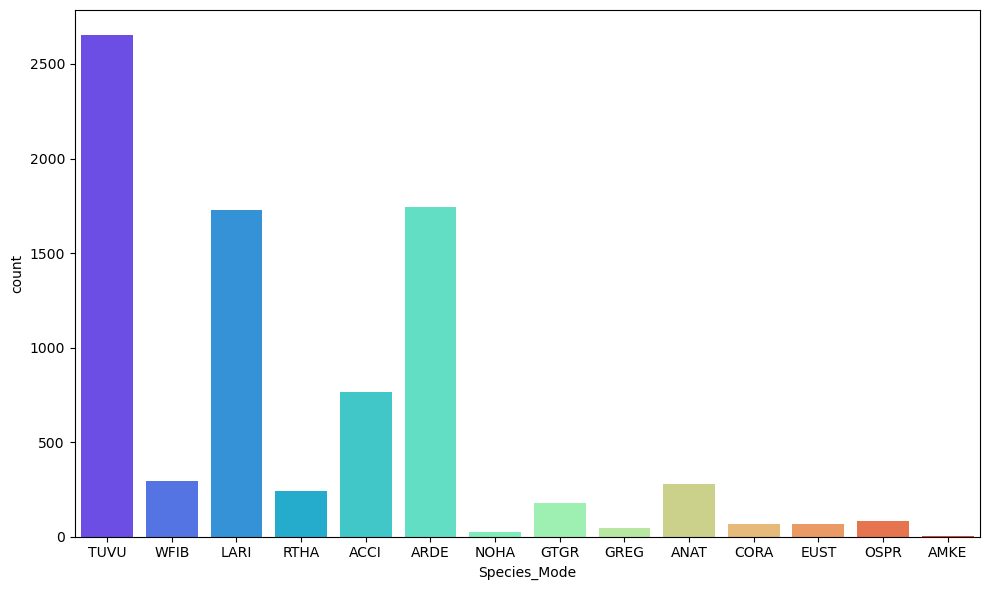

In [26]:
# Graficar el conteo por especie
plt.figure(figsize=(10, 6))
sns.countplot(x='Species_Mode', data=data_groupid, palette="rainbow")
plt.tight_layout()

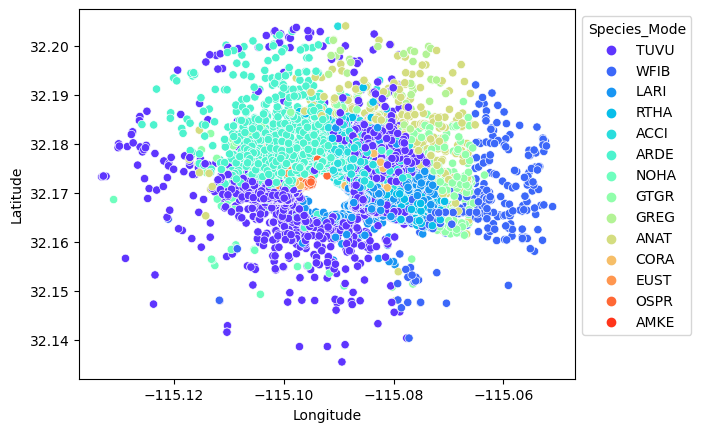

In [28]:
# Graficar la ubicación por especie 
ax = sns.scatterplot(x='Longitude', y='Latitude', data=data_groupid, hue='Species_Mode', palette='rainbow')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))